**Learner Name: Damian Najera**

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [75]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [76]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [77]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [78]:
# Use the shape attribute to get the number of rows and colums
num_rows, num_cols = df.shape
print("The number of rows is:", num_rows)
print("The number of columns is:", num_cols)


The number of rows is: 1898
The number of columns is: 9


#### Observations:
By using the `shape` attribute of `pandas.DataFrame`, we can see that there are 1898 rows and 9 columns. 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [79]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
By using `df.info()`, we can see the data has 3 different datatypes:
- 1 column of type float64, which is a 64-bit floating point number
    - cost_of_the_order
- 4 columns of type int64, which is a 64-bit integer
    - order_id, customer_id, food_preparation_time, dellivery_time
- 4 columns of type object, which is often used to store string values
    - restaurant_name, cuisine_type, day_of_the_week, rating

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [80]:
# Loop through each object-type column and print the unique values
for col in df.select_dtypes(include=['object']):
    print(col)
    print(df[col].unique())
    print()

restaurant_name
['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'Five Guys Burgers and Fries' 'Tortaria'
 'Cafe Mogador' 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza'
 'Sushi of Gari 46' 'The Kati Roll Company' 'Klong' '5 Napkin Burger'
 'TAO' 'Parm' 'Sushi Samba' 'Haru Gramercy Park'
 'Chipotle Mexican Grill $1.99 Delivery' 'RedFarm Broadway' 'Cafeteria'
 'DuMont Burger' "Sarabeth's East" 'Hill Country Fried Chicken' 'Bistango'
 "Jack's Wife Freda" "Mamoun's Falafel" 'Prosperity Dumpling'
 'Blue Ribbon Sushi Bar & Grill' 'Westville Hudson' 'Blue Ribbon Brooklyn'
 'Nobu Next Door' 'Osteria Morini' 'Haandi' 'Benihana' 'Han Dynasty'
 'Chote Nawab' 'Mission Cantina' "Xi'an Famous Foods" 'R

#### Observations:
Based on the output of `df.info()` from the previous question, we can see that the Non-Null Count is the same as the total number of rows, for each of the columns. This implies that there is no missing data. However, the above code allows us to look at all the unique values of each of those columns. We can see that for `rating` we have a unique value of 'Not given', indiciating missing ratings. We need to handle this. We can handle this by replacing these values with `NaN` values, with the following code below:

In [81]:
# Replace all 'Not given' values in column 'rating' with NaN, and make the changes in the original dataframe df, then print the unique values
df['rating'].replace('Not given', np.nan, inplace=True)
print(df['rating'].unique())

[nan '5' '3' '4']


#### Observations:
After executing the code, we can look again at the unique values for column `rating`. We see that the 'Not given' rating values have now been replaced with 'NaN'. Now also for future use in analysis that follows, it might be useful and appropriate to convert `rating` types to be of type float, rather than string objects, since they do represent numerical ratings up to 5. We can do this with the following code:


In [82]:
# Convert all values in column 'rating' to be float-type
df['rating'] = df['rating'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


From calling `info()` on our dataframe, we can see that the column for `rating` has now been changed from `object` to `float64`.  

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [83]:
# Get summary statistics on column 'food_preparation_time'
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
Based on the output of the `describe()` function on the `food_preparation_time` column, we can see:

- min: 20 minutes
- average: 27.371970 minutes
- max: 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [84]:
# Sum up the numbers of rows that have missing or NaN values in column 'rating'
df['rating'].isna().sum()

736

#### Observations:
We can use `isna()` to find and sum up how many orders are have the NaN value we assigned before. According to the output: 736 orders are not rated. 


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Observations on Order ID**

In [85]:
# check number of unique order IDs
df['order_id'].nunique()  

1898

#### Observations:
There are 1898 unique order IDs, which is the same number of rows in this dataset, implying there are no duplicate orders. 

**Observations on Customer ID**

In [86]:
# check number of unique customer IDs
df['customer_id'].nunique()  

1200

1     784
2     267
3      83
4      33
5      19
6       6
7       4
8       1
9       1
10      1
13      1
Name: customer_id, dtype: int64


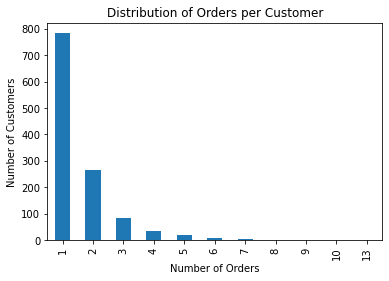

In [87]:
# Calculate the frequency count of each unique customer ID
customer_order_counts = df['customer_id'].value_counts()

# Calculate the frequency count of the order counts (number of orders per customer)
order_counts = customer_order_counts.value_counts().sort_index()

# Create the distribution plot
order_counts.plot(kind='bar')

# Set the plot labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders per Customer')

# Display the statistics of the order counts
print(order_counts)

# Display the plot
plt.show()

#### Observations:
- There are 1200 unique customer IDs, which indicates that some customers have more than 1 order, also indicating that there are customers that frequenty order from FoodHub.
- There is an order count rate among these customers from 1 - 13 orders. 
- A majority of customers placed only one order. 

**Observations on Restaurant Name**

`restaurant_name` is a categorical variable that represents the name of the restaurant that received the food ordered. We can perform univariate analysis on this column to look for any insights into the frequency of orders placed at each restaurant and possibly infer which restaurants are more popular.

Let us begin by first looking at the frequency distribution.  We can look at a frequency distribution table and create a bar chart from this to show the number of orders placed at each restraunt. This can give us a visual representation on the more popular restaurant and the less popular restaurants.

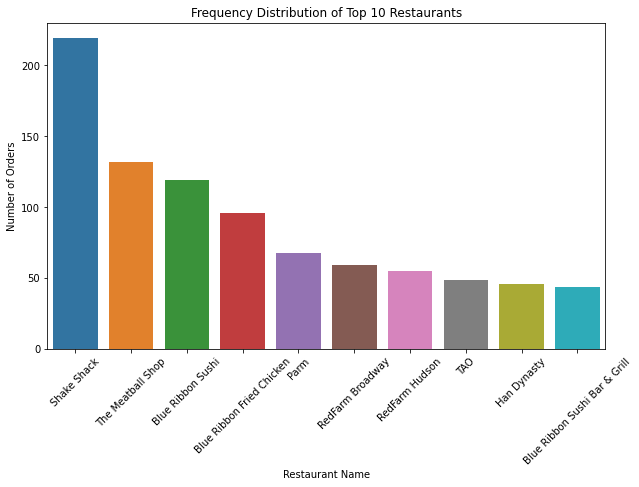

In [88]:
# Group the data by restaurant_name and get the count of orders
restaurant_orders = df.groupby('restaurant_name')['order_id'].count()

# Sort the restaurants based on the count of orders in descending order and select the top 10
top_restaurants = restaurant_orders.sort_values(ascending=False).head(10)

# Plot the frequency distribution of the top 10 restaurants
plt.figure(figsize=(10, 6))
sns.barplot(x=top_restaurants.index, y=top_restaurants.values)
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.title('Frequency Distribution of Top 10 Restaurants')
plt.xticks(rotation=45)
plt.show()

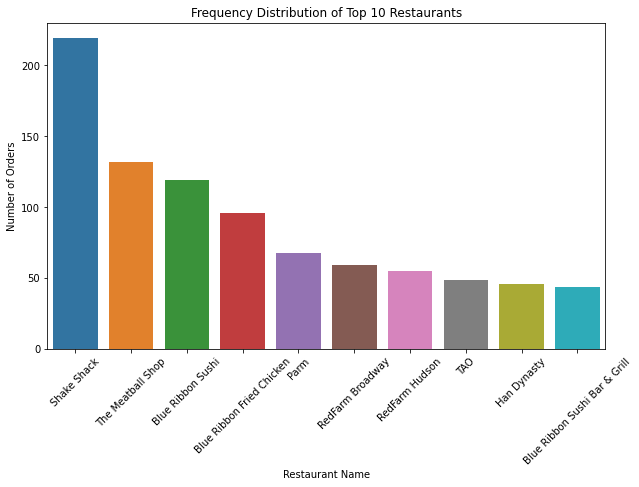

In [89]:
# Group the data by restaurant_name and get the count of orders
restaurant_orders = df.groupby('restaurant_name')['order_id'].count()

# Sort the restaurants based on the count of orders in descending order and select the top 10
top_restaurants = restaurant_orders.sort_values(ascending=False).head(10)

# Plot the frequency distribution of the top 10 restaurants
plt.figure(figsize=(10, 6))
sns.barplot(x=top_restaurants.index, y=top_restaurants.values)
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.title('Frequency Distribution of Top 10 Restaurants')
plt.xticks(rotation=45)
plt.show()


#### Observations:
Based on the frequency distribution, it clearly looks like certain restaurants are more popular than others. Just looking at this frequency of orders, it looks like some of the restaurants further to the right are not significantly different in their order count.

Let us look further into this and look at the percentage distribution. The percentage distribution can show the percentage of food orders placed at each restaurant, based on their market share among the customers. This can help identify the most popular restaurants and the ones that are less popular, based on the percentage of orders they receive relative to the other restaurants in the dataset.

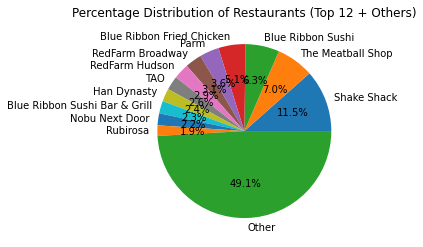

In [131]:
# Create a percentage distribution of the restaurant_name column
restaurant_counts = df['restaurant_name'].value_counts(normalize=True)

# Select the top 12 restaurants and combine others
top_restaurants = restaurant_counts[:12]
other_restaurants = restaurant_counts[12:].sum()
restaurant_distribution = pd.concat([top_restaurants, pd.Series(other_restaurants, index=['Other'])])

# Create a pie chart of the percentage distribution 
plt.pie(restaurant_distribution.values, labels=restaurant_distribution.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Restaurants (Top 12 + Others)')
plt.show()


#### Observations:
A few restaurant appear to account for a large part of the market share among customers. The top 4 restaurants shown here account for about 30% of the total orders of the dataset. From this we can infer that a few of the most popular restaurants account for a large part of the market share. The top 12 restaurants account for more than 50% of the total orders. 

**Observations on Cuisine Type**

`cuisine_type` is a categorical variable that represents the type of cuisine that was ordered by the customer. We can perform univariate analysis on this column to look for any insights into the frequency of each cuisine type and look for any insights into food preferences and tastes of the customers. 

Let us begin by first looking at the frequency distribution.  We can look at a frequency distribution table and create a bar chart from this and help identify the most popular cuisines and also the ones that are less popular. 

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64


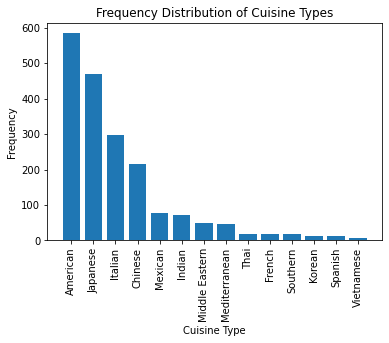

In [91]:
# Create a frequency distribution of the restaurant_name column
cuisine_counts = df['cuisine_type'].value_counts()

# Print the frequency distribution table
print(cuisine_counts)

# Create a bar chart of the frequency distribution
plt.bar(cuisine_counts.index, cuisine_counts.values)
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Cuisine Types')
plt.xticks(rotation=90)
plt.show()

#### Observations:
Based on the frequency distribution, it clearly looks like certain cuisine types are more popular than others. Let us continue and look at the percentage distribution:

American          30.769231
Japanese          24.762908
Italian           15.700738
Chinese           11.327713
Mexican            4.056902
Indian             3.846154
Middle Eastern     2.581665
Mediterranean      2.423604
Thai               1.001054
French             0.948367
Southern           0.895680
Korean             0.684932
Spanish            0.632244
Vietnamese         0.368809
Name: cuisine_type, dtype: float64


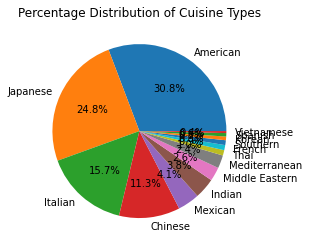

In [92]:
# Create a percentage distribution of the cuisine type column
cuisine_counts = df['cuisine_type'].value_counts(normalize=True) * 100

# Print the percentage distribution table
print(cuisine_counts)

# Create a pie chart of the percentage distribution
plt.pie(cuisine_counts.values, labels=cuisine_counts.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Cuisine Types')
plt.show()

#### Observations:
Based on the percentage distribution we can see insights that American, Japanese, Italian and Chinese food together account for about 82.6% of the total orders. These are clearly the most popular types of cuisine that dominate the market share. 

**Observations on Cost of the Order**

In [93]:
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

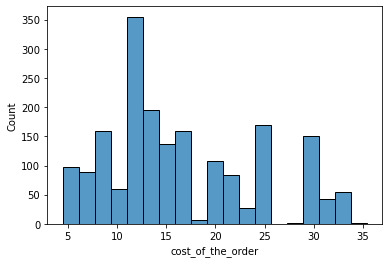

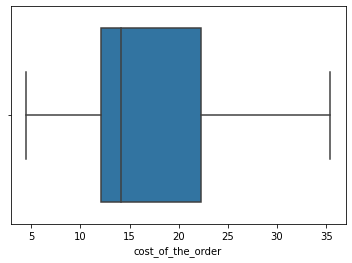

In [94]:
# Create a histogram of the cost_of_the_order column
sns.histplot(data=df, x='cost_of_the_order')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

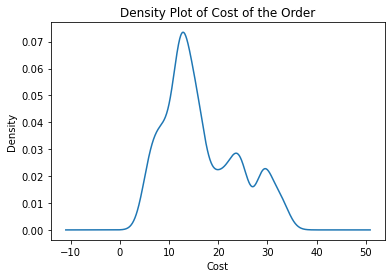

In [95]:
# Create a density plot of the cost_of_the_order column
df['cost_of_the_order'].plot(kind='density')

# Set the plot title and axis labels
plt.title('Density Plot of Cost of the Order')
plt.xlabel('Cost')
plt.ylabel('Density')

# Show the plot
plt.show()

#### Observations:
- Minimum: $4.47
- Mean: $16.50
- Maximum: $35.41
- There are no outliers for `cost_of_the_order`
- It looks like most of the orders are in the range of $12 to $17

**Observations on Days of the Week**

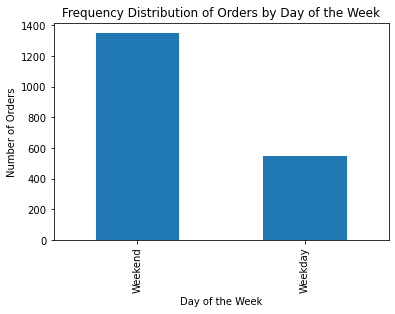

In [96]:
# Compute the frequency distribution of the day_of_the_week column
day_counts = df['day_of_the_week'].value_counts()

# Create a bar chart of the frequency distribution
day_counts.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Frequency Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

# Show the plot
plt.show()

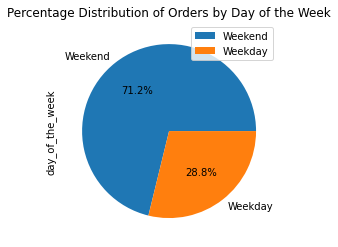

In [97]:
# Compute the percentage distribution of the day_of_the_week column
day_pct = df['day_of_the_week'].value_counts(normalize=True) * 100

# Create a pie chart of the percentage distribution
day_pct.plot(kind='pie', autopct='%1.1f%%')

# Set the plot title and legend
plt.title('Percentage Distribution of Orders by Day of the Week')
plt.legend(loc='best')

# Show the plot
plt.show()

#### Observations
A majority of the orders places were on the weekend. It is important to remember that there are 5 days (Monday, Tuesday, Wednesday, Thursday, Friday) that fall under 'Weekday' and only 2 days (Saturday and Sunday) that full under 'Weekend'. The number of orders places on the Weekend account for 71.2% of the total orders. 

**Observations on Food Preparation Time**

In [98]:
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

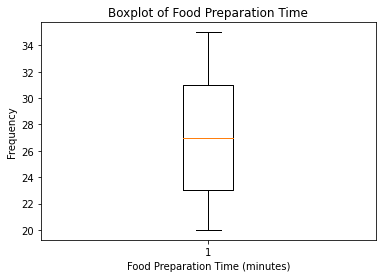

In [99]:
# Create a boxplot of the food_preparation_time column
plt.boxplot(df['food_preparation_time'])

# Set the plot title and axis labels
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

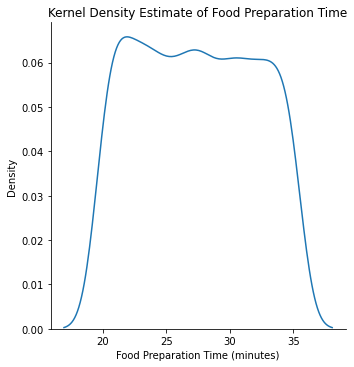

In [100]:
# Create a KDE plot of the food_preparation_time column, set the plot title and axis labels
sns.displot(data=df,x='food_preparation_time',kind='kde')
plt.title('Kernel Density Estimate of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Density')

# Show the plot
plt.show()

#### Observations
- Minimum time: 20 minutes
- Mean time: 27.371970 minutes
- Maximum time: 35 minutes 
- There are no outliers for `food_preparation_time`
- The KDE is pretty symmetic with no anomolies

**Observations on Delivery Time**

In [101]:
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

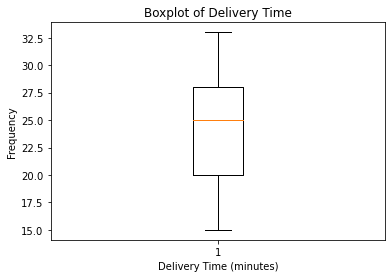

In [102]:
# Create a boxplot of the delivery_time column
plt.boxplot(df['delivery_time'])

# Set the plot title and axis labels
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

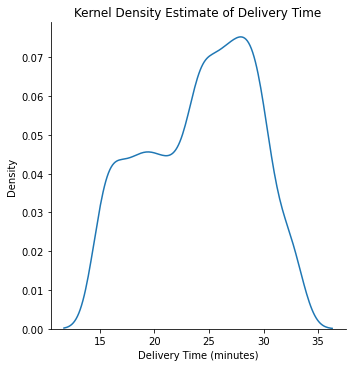

In [103]:
# Create a KDE plot of the delivery_time column, set the plot title and axis labels
sns.displot(data=df,x='delivery_time',kind='kde')
plt.title('Kernel Density Estimate of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Density')

# Show the plot
plt.show()

#### Observations
- Minimum time: 15 minutes
- Mean time: 24.161749 minutes
- Maximum time: 33 minutes
- There are no outliers for `delivery_time`
- The KDE looks a bit odd from about 22 minutes to about 30 minutes, showing higher density of this range


**Observations on Rating**

In [104]:
df['rating'].mode()

0    5.0
Name: rating, dtype: float64

5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64


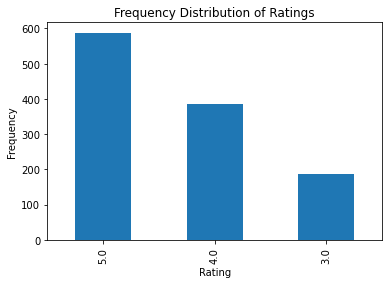

In [105]:
# Create a frequency distribution of ratings
rating_counts = df['rating'].value_counts()

# Print the counts
print(rating_counts)

# Plot the frequency distribution as a bar chart
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Ratings')
plt.show()

5.0    50.602410
4.0    33.218589
3.0    16.179002
Name: rating, dtype: float64


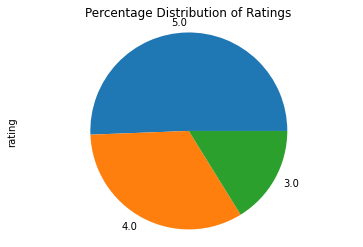

In [106]:
# Create a percentage distribution of ratings
rating_pct = df['rating'].value_counts(normalize=True) * 100

# Print the percentages
print(rating_pct)

# Plot the percentage distribution as a pie chart
rating_pct.plot(kind='pie')
plt.axis('equal')
plt.title('Percentage Distribution of Ratings')
plt.show()

#### Observations
- The most common rating given is 5 stars
- 5 stars is the most given rating, followed by 4 stars, followed by 3 stars
- 5 star ratings account for about 50.6% of the total ratings given
- 4 star ratings account for about 33.2% of the total ratings given
- 3 star ratings account for about 16.2% of the total ratings given

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [107]:
# Get the top 5 restaurants by number of orders received
top_restaurants = df['restaurant_name'].value_counts().head(5)

# Print the top 5 restaurants
print(top_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [108]:
# Filter the DataFrame to include only weekends
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Get the most popular cuisine on weekends
most_popular_cuisine = weekend_orders['cuisine_type'].value_counts().head(1)

# Print the most popular cuisine
print("The most popular cuisine on weekends is: ", most_popular_cuisine.index[0])

The most popular cuisine on weekends is:  American


#### Observations:
American is the most popular cuisine on the weekends. 


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [109]:
# Filter the DataFrame to include only orders with cost greater than 20 dollars
cost_above_20 = df[df['cost_of_the_order'] > 20]

# Calculate the percentage of orders with cost greater than 20 dollars
percent_above_20 = (cost_above_20.shape[0] / df.shape[0]) * 100

# Print the percentage of orders with cost above 20 dollars
print("Percentage of orders with cost above $20: {:.2f}%".format(percent_above_20))

Percentage of orders with cost above $20: 29.24%


#### Observations:
29.24% of the orders cost more than $20.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [110]:
# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Print the mean delivery time
print("The mean delivery time is: {:.2f} minutes".format(mean_delivery_time))

The mean delivery time is: 24.16 minutes


#### Observations:
The mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [111]:
# Get the top 3 most frequent customers
top_customers = df['customer_id'].value_counts().head(3)

# Print the top 3 most frequent customers
print("The top 3 most frequent customers are:")
for i, (customer_id, count) in enumerate(top_customers.items()):
    print("{}) Customer ID {}: {} orders".format(i+1, customer_id, count))

The top 3 most frequent customers are:
1) Customer ID 52832: 13 orders
2) Customer ID 47440: 10 orders
3) Customer ID 83287: 9 orders


#### Observations:
1. Customer ID 52832: 13 orders
2. Customer ID 47440: 10 orders
3. Customer ID 83287: 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Cuisine vs Cost of the order**

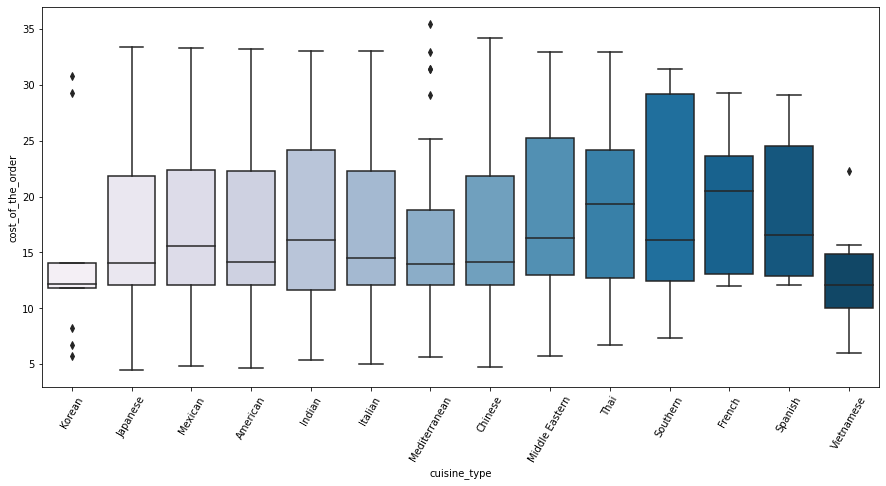

In [112]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations
- Outliers are present for: Korean, Mediterranean, and Vietnamese
- Korean has the smallest variability is cost of the order (small whiskers)
- Vietnamese has the lowest median cost of order
- French has the highest median cost of order

**Cuisine vs Food Preparation time**

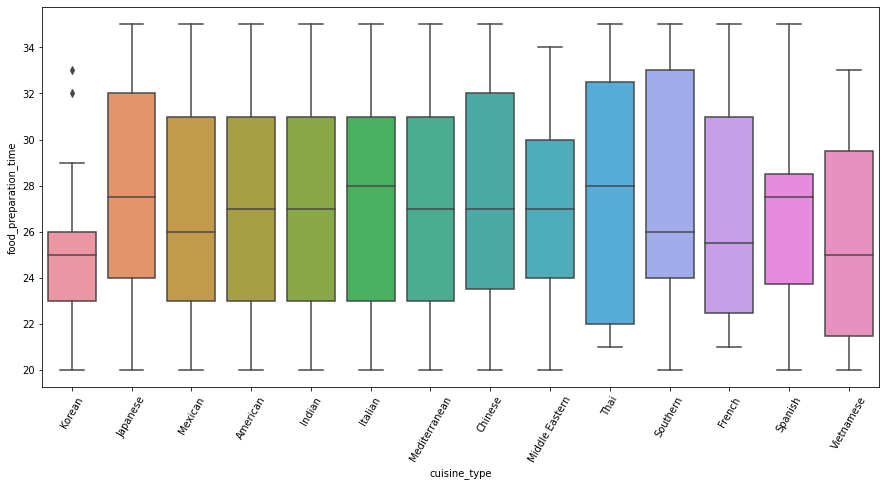

In [113]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation = 60)
plt.show()

#### Observations
- Outliers are present for: Korean
- Korean has the smallest variability in terms of food preparation time (smallest whiskers compared to other cuisine types)
- American, Indian and Mediterranean appear to be identical 

**Day of the Week vs Delivery time**

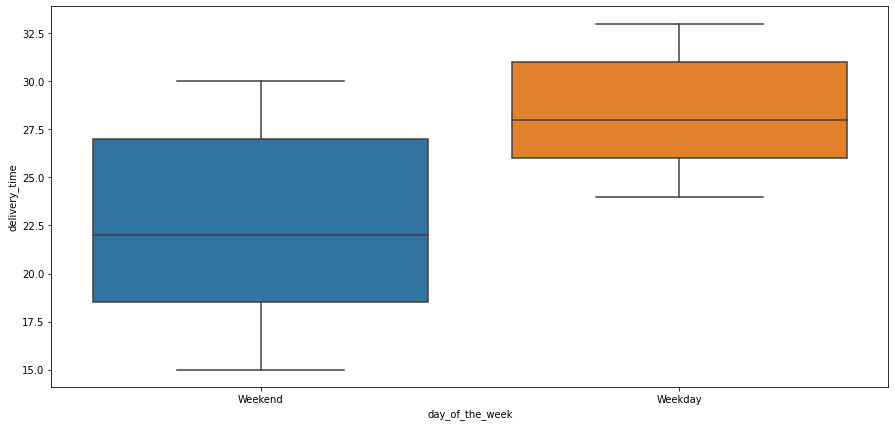

In [114]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.show()

**Day of the Week vs Food Preparation time**

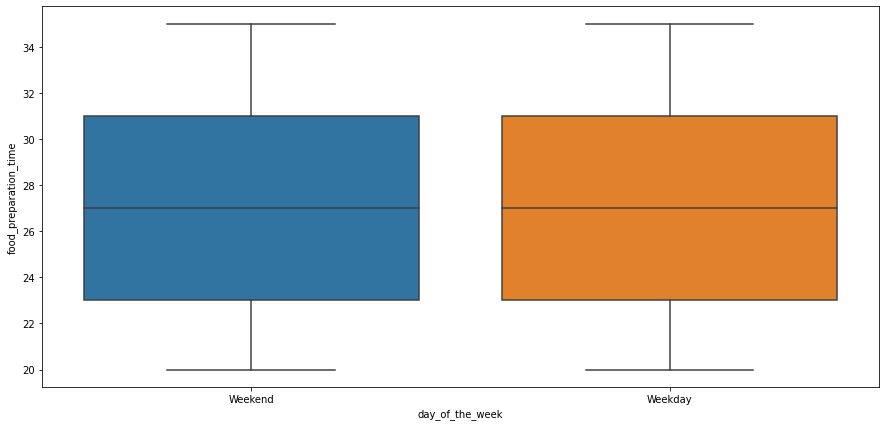

In [115]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.show()

#### Observations
Food preparation time for weekend and weekday have identical box plots, indicating that restaurants are very consistent with their preparation time regardless of what day it is or if it is the weekday or weekend.

#### Observations
- Mean delivery time on weekdays is longer than mean delivery team on weekends
- Weekday delivery times have the less variability compared to delivery times on the weekends

#### Ruevenue generated by the Top 14 restaurants. 

In [116]:
top_14_restaurants = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)
print(top_14_restaurants)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64


#### Observations
- Shake Shack leads all restaurants in terms of revenue, leading the second highest revenue restaurant by about $1,400
- Restaurants 2-4 in terms of revenue are closer together, with a range of about $500 from 2 to 4
- Restaurants 6-14 get closer and closer together, with the difference in revenue decreasing as we go down the list

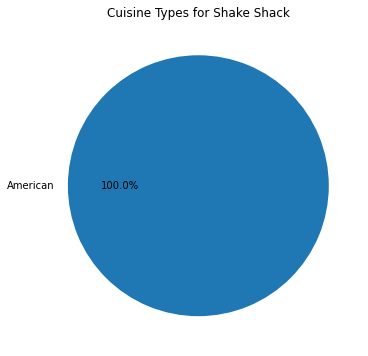

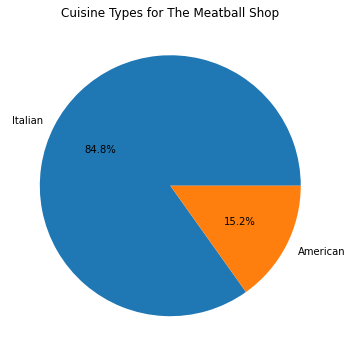

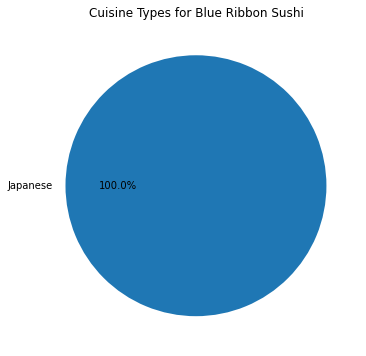

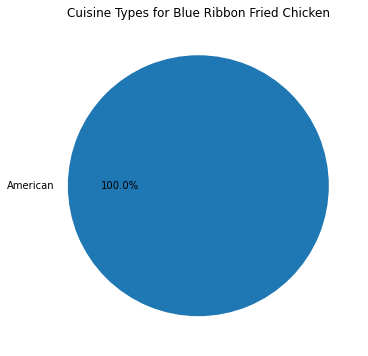

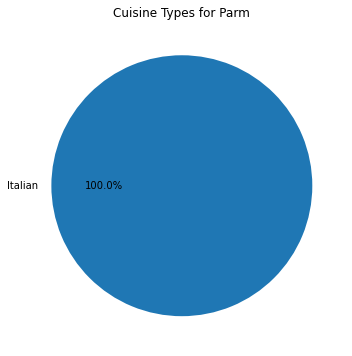

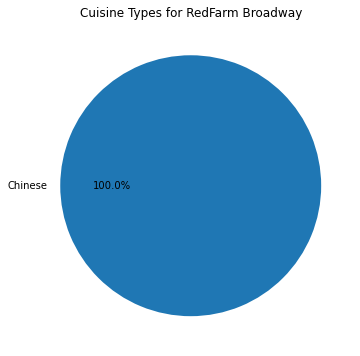

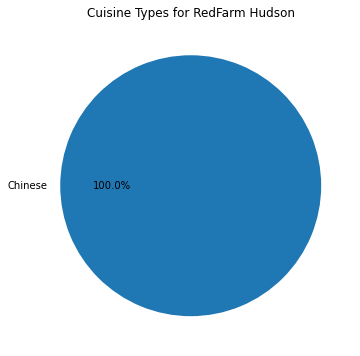

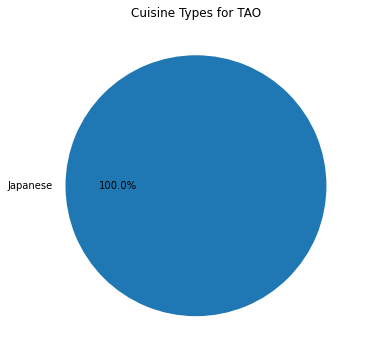

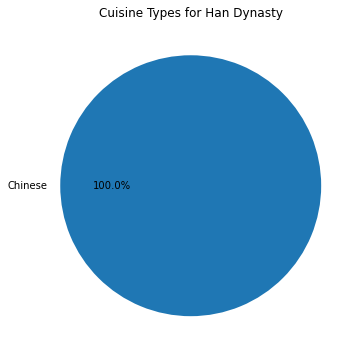

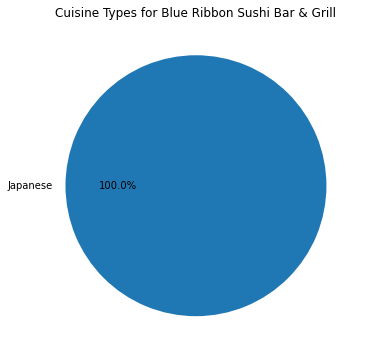

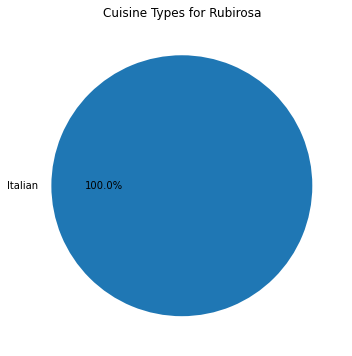

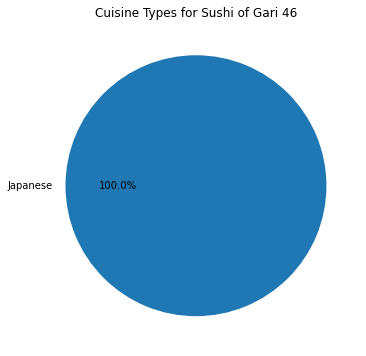

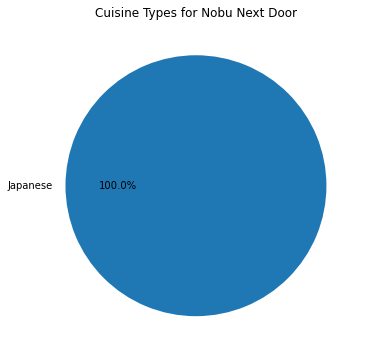

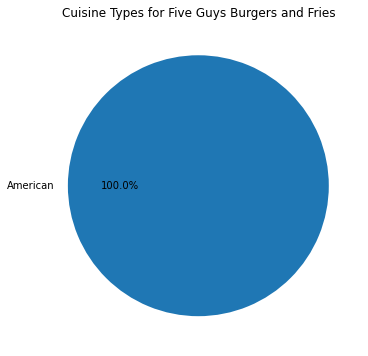

In [117]:
# Get the names of the top 14 restaurants in a list
top_14_restaurant_names = top_14_restaurants.index.tolist()

# Iterate over each restaurant name in the top_14_restaurant_names list
for restaurant_name in top_14_restaurant_names:
    # Filter the data for the current restaurant
    restaurant_data = df[df['restaurant_name'] == restaurant_name]
    
    # Count the frequency of each cuisine type for the current restaurant
    cuisine_counts = restaurant_data['cuisine_type'].value_counts()
    
    # Create a pie chart for the cuisine types
    plt.figure(figsize=(6, 6))
    plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%')
    plt.title(f"Cuisine Types for {restaurant_name}")
    plt.show()

#### Observations
- 13 out of the top 14 highest revenue restaurants sold only 1 type of cuisine
- Types of cuisine among the top 14 highest revenu restaurants:
    - American, Italian, Japanese, Chinese
- These 4 cuisines are consistent with our univariate analysis on the frequency distribution for the types of cuisines, which showed that these 4 cuisines types account for the top 4 most ordered

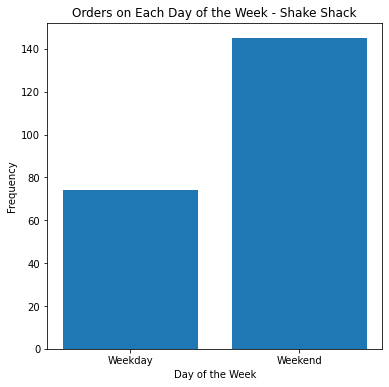

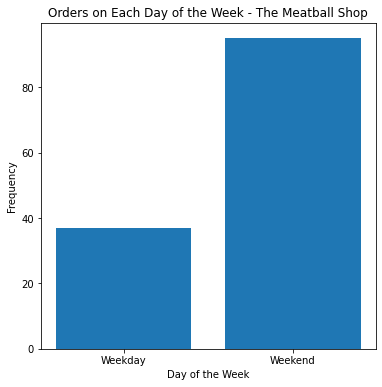

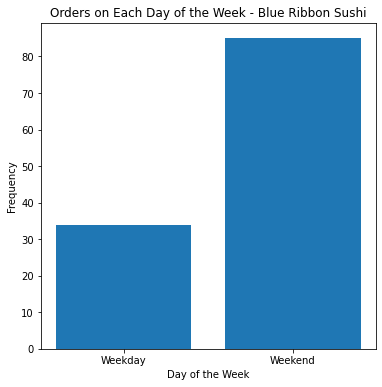

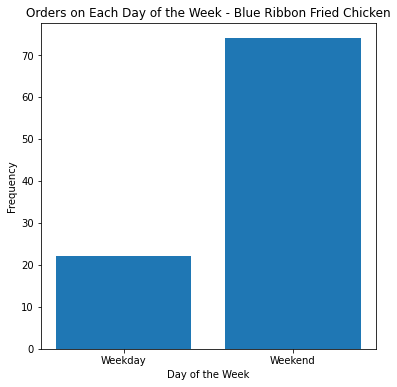

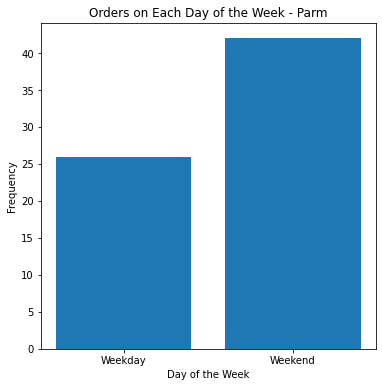

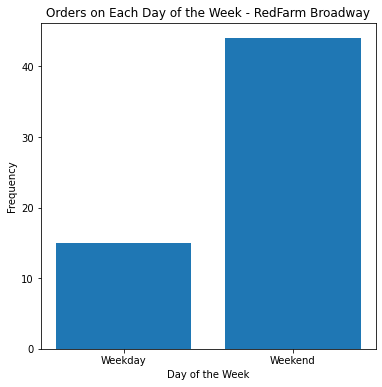

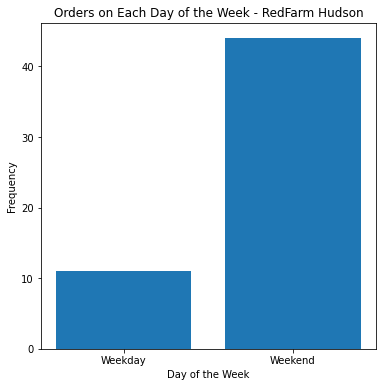

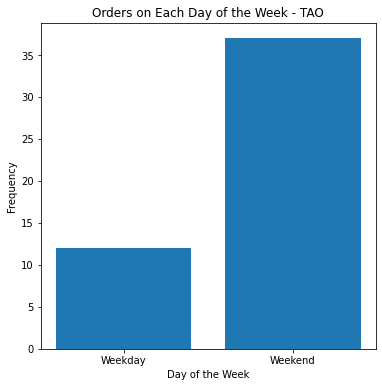

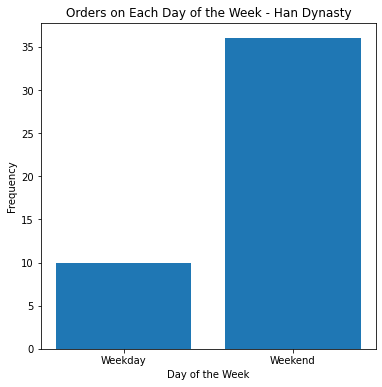

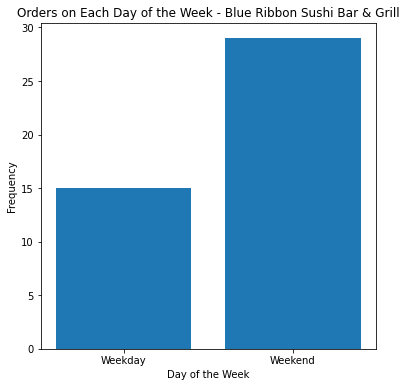

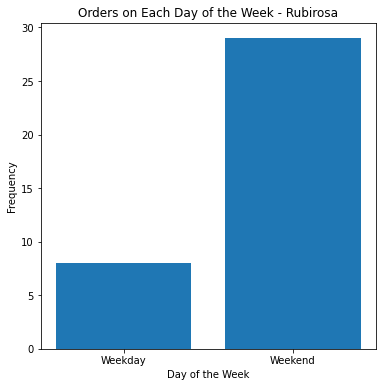

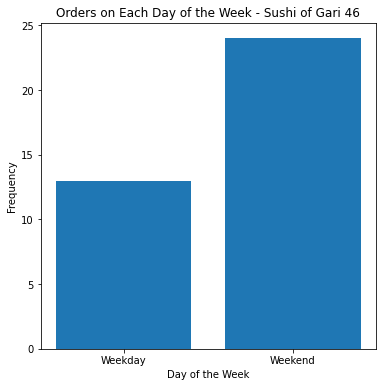

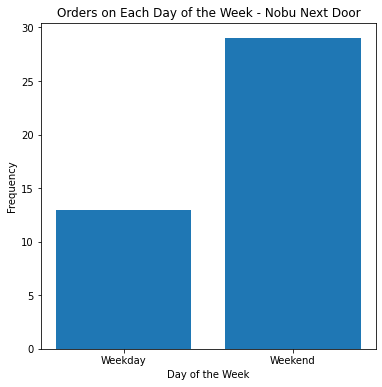

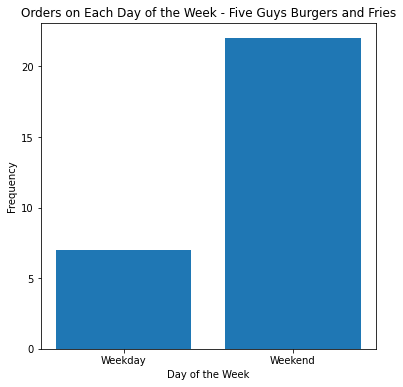

In [118]:
# Iterate over each restaurant name in the top_restaurant_names list
for restaurant_name in top_14_restaurant_names:
    # Filter the data for the current restaurant
    restaurant_data = df[df['restaurant_name'] == restaurant_name]
    
    # Count the frequency of orders for each day of the week
    day_counts = restaurant_data['day_of_the_week'].value_counts()
    
    # Create an array of weekdays and weekends for x-axis labels
    days = ['Weekday', 'Weekend']
    
    # Create an array of frequencies for y-axis values
    frequencies = [day_counts['Weekday'], day_counts['Weekend']]
    
    # Create a bar graph for the day of the week orders
    plt.figure(figsize=(6, 6))
    plt.bar(days, frequencies)
    plt.title(f"Orders on Each Day of the Week - {restaurant_name}")
    plt.xlabel("Day of the Week")
    plt.ylabel("Frequency")
    plt.show()

#### Observations
All of the top 14 highest revenue restaurants had more of their orders on the weekend than on a weekday.

**Rating vs Delivery time**

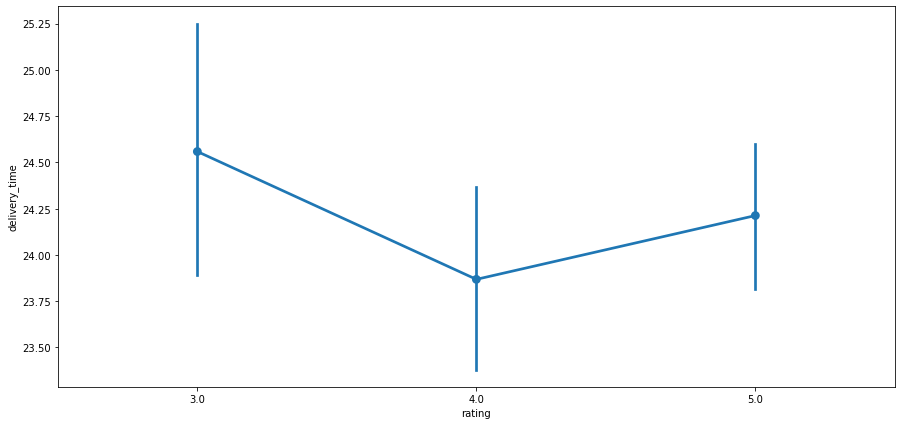

In [119]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observations
There is quite a bit of overlap in that all of the 5 star reviews still fall in the same delivery times as 3 star reviews. The 4 star ratings have the most difference where there are many 4 star ratings that have delivery times less than all the 3 and 5 star ratings. 

**Rating vs Food preparation time**

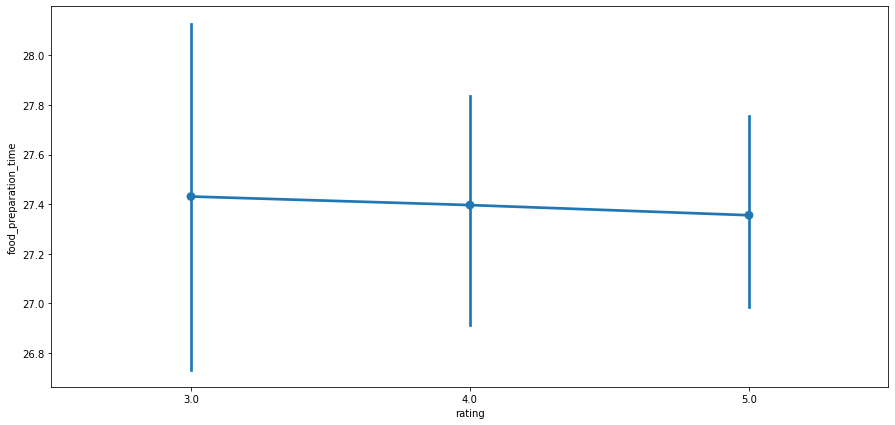

In [120]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x="rating", y="food_preparation_time", data=df)
plt.show()

#### Observations
Food preparation times have less variability going from 3 to 4 star ratings, and even less variability going from 4 to 5 star ratings. This could indicate that smaller food preparation times have a positive correlation with a higher rating. 

**Rating vs Cost of the order**

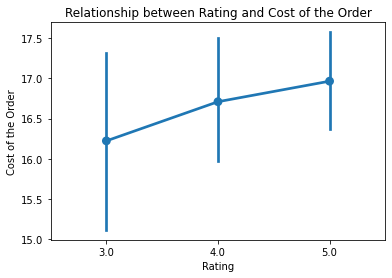

In [121]:
# Relationship between rating and cost of the order
sns.pointplot(x='rating', y='cost_of_the_order', data=df)
plt.title('Relationship between Rating and Cost of the Order')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.show()

#### Observations
We can see that there is less variability in cost of the order from 3 star rating to 4 star rating, and even less variability going from 4 star to 5 star ratings. We can also see that there is a positive correlation - this may indicate that orders with high costs are more likely to get a higher rating and this may be due to customers understanding and appreciating receiving their high cost orders successfully. 

**Correlation Among Variables**

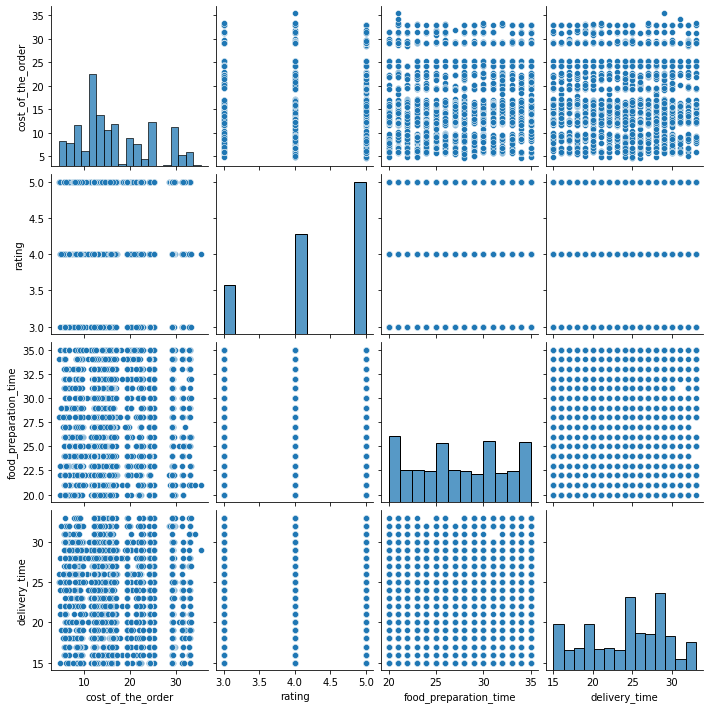

In [122]:
# Select the columns to compute correlation for
cols = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']

# Create a pairplot of the selected columns
sns.pairplot(df[cols])

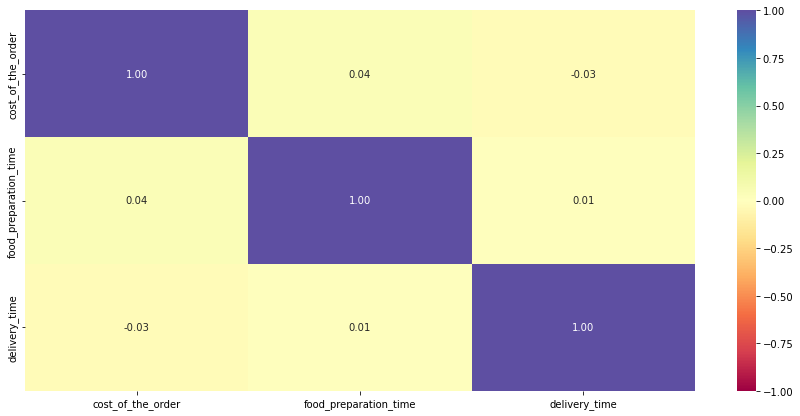

In [123]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations
- Slight negative correlation between cost of the order and delivery time
- Slight positive correlation between cost of the order and food preparation time
- Slight positive correlation between food preparation time and delivery time
- Slight positive correlation between food preparation time and cost of the order
- Slight positive correlation between delivery time and food preparation time
- Slight negative correlation between delivery time and cost of the order


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [124]:
# Group the data by restaurant_name and get the count and mean of rating
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter the restaurants based on the given conditions
popular_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Print the popular restaurants
print(popular_restaurants)

                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
There are 4 restaurants that meet this criteria to get the promotional offer:
- Blue Ribbon Fried Chicken
- Blue Ribbon Sushi
- Shake Shack
- The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [125]:
# Calculate the revenue generated by the company for each order
# Create a new column 'revenue' for each row and initialize it to 0, then fill assign value based on cost_of the order
df['revenue'] = 0
df.loc[df['cost_of_the_order'] > 20, 'revenue'] = 0.25 * df['cost_of_the_order']
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'revenue'] = 0.15 * df['cost_of_the_order']

# Calculate the total revenue generated by the company
total_revenue = df['revenue'].sum()

# Print the total revenue generated by the company
print("The net revenue generated by the company across all orders is: ${:.2f}".format(total_revenue))

The net revenue generated by the company across all orders is: $6166.30


#### Observations:
The net revenue generated by the company across all orders is: $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [126]:
# Create a new column 'total_time' as the sum of 'delivery_time' and 'food_preparation_time'
df['total_time'] = df['delivery_time'] + df['food_preparation_time']

# Filter orders that take more than 60 minutes to deliver
late_orders = df[df['total_time'] > 60]

# Calculate the percentage of late orders
percent_late_orders = (len(late_orders) / len(df)) * 100

print(f"{percent_late_orders:.2f}% of orders take more than 60 minutes to get delivered")

10.54% of orders take more than 60 minutes to get delivered


#### Observations:
10.54% of orders take more than 60 minutes to get delivered

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [127]:
# Filter orders for weekdays and weekends
weekday_orders = df[df['day_of_the_week'] == 'Weekday']
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Calculate mean delivery time for weekdays and weekends
weekday_mean_delivery_time = weekday_orders['delivery_time'].mean()
weekend_mean_delivery_time = weekend_orders['delivery_time'].mean()

print("Mean delivery time for weekday orders: {:.2f} minutes".format(weekday_mean_delivery_time))
print("Mean delivery time for weekend orders: {:.2f} minutes".format(weekend_mean_delivery_time))

Mean delivery time for weekday orders: 28.34 minutes
Mean delivery time for weekend orders: 22.47 minutes


#### Observations:
Mean delivery time for weekday orders: 28.34 minutes
Mean delivery time for weekend orders: 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

To answer this, I want to look at a few more things in order to provide valuable recommendations to the business. The food aggregator business gets its revenue by charging restaurants based on the cost of the order from the restaurant. I want to further analyze this revenue generated: 

**Order Distribution by Cost**

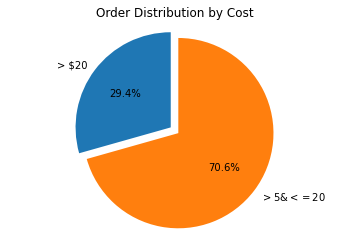

In [128]:
# Count the number of orders falling into each category
orders_greater_than_20 = len(df[df['cost_of_the_order'] > 20])
orders_greater_than_5_less_than_equal_to_20 = len(df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)])

# Calculate the percentage of orders for each category
total_orders = len(df)
percentage_greater_than_20 = (orders_greater_than_20 / total_orders) * 100
percentage_greater_than_5_less_than_equal_to_20 = (orders_greater_than_5_less_than_equal_to_20 / total_orders) * 100

# Create a pie chart
labels = ['> $20', '> $5 & <= $20']
sizes = [percentage_greater_than_20, percentage_greater_than_5_less_than_equal_to_20]
explode = (0.1, 0)  # Explode the first slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Order Distribution by Cost')
plt.show()

### Observations:
- 70.6% of the orders that the food aggregator generates revenue from are within that range of greater than $5 and less than or equal to $20 where they charge 15% of the cost of the order
- 29.4% of the orders that the food aggregator generates revenue from are within that range of greater than $20 where they charge 25% of the cost of the order

**Revenue Distribution Comparison of those orders (> $25) and those (<= 25 and >5)**

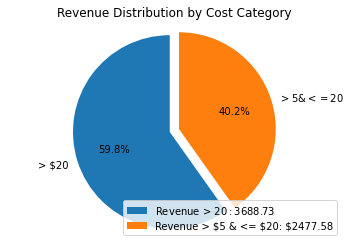

In [129]:
# Calculate the revenue for orders greater than $20
revenue_greater_than_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25

# Calculate the revenue for orders greater than $5 but less than or equal to $20
revenue_greater_than_5_less_than_equal_to_20 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15

# Calculate the total revenue
total_revenue = revenue_greater_than_20 + revenue_greater_than_5_less_than_equal_to_20

# Calculate the percentage of revenue for each cost category
percentage_greater_than_20 = (revenue_greater_than_20 / total_revenue) * 100
percentage_greater_than_5_less_than_equal_to_20 = (revenue_greater_than_5_less_than_equal_to_20 / total_revenue) * 100

# Create a list of revenue labels
revenue_labels = [
    f'Revenue > $20: ${revenue_greater_than_20:.2f}',
    f'Revenue > $5 & <= $20: ${revenue_greater_than_5_less_than_equal_to_20:.2f}'
]

# Create a pie chart to show the percentage of total revenue for each cost category
labels = ['> $20', '> $5 & <= $20']
sizes = [percentage_greater_than_20, percentage_greater_than_5_less_than_equal_to_20]
explode = (0.1, 0)  # Explode the first slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Revenue Distribution by Cost Category')

# Add revenue labels
plt.legend(revenue_labels, loc='lower right')

plt.show()

#### Observations:
Although the greater than `$5` and less than or equal to `$20` category account for 70.6% of the total orders, we can see it only account for about 40.2% of the total revenue for the food aggregator. The majority of revenue for the food aggregator still comes mostly from the category of orders greater than `$20`. 

### Conclusions:
* A majority of customers have only placed one order 
*  More orders are placed on Weekends (71.2% on weekend vs 28.8% on weekdays)
* American, Japanese, Italian and Chinese cuisine types are the most popular and account for just over 80% of all orders
* A majority of the orders placed fall in the `$12 - $17` range, not too far away from being greater than `$20`, where the food aggregator could charge the restaurants 25% on the cost of the order
* The food aggregator makes most of their revenue from orders with cost greater than `$20`

### Recommendations:

*  Because American, Japanese, Italian and Chinese cuisine types are the most popular and account for just over 80% of all orders, I would advise to promote these cuisine types as the data shows these are the most popular with customers.
* Because most orders placed are in the `$12 - $17` (based on our univariate analysis of cost of the order), I would advise to promote food items within this range in order because based on the data, this seems to be a range that customers are comfortable with and if they see easily see food items in this range, they may be more likely to go ahead and order. Then at checkout, consider offering the customer a discount or coupon for future use if they add-on some food item that will bring their total to just over `$20`. Something like "You are `$3.92` away from saving 5% on your next order!" or a "Recommended extras!" This way the food aggregator business is more likely to achieve that 25% of the food order total.
* Another recommendation is to create coupons and offer discounts to help customers get their cost of the order in that `$12 - $17` range in order to appeal to those customers who are adamant about not spending more than `$20` on their order. The idea here is that if you cannot get a customer to get their cost of the order to over `$20`, get it as close to `$20` as possible and still in a range that they are comfortable with (`$12 - $17`, but hopefully closer to `$17`).
* Offer coupons and discounts on weekends and incentivize orders that cost more than `$20`, as the data shows that most orders are placed on the weekend. Increase marketing and push notifications to engage customers. The idea here is to get the larger amounts of customers that order on the weekend to spend up a bit more in order for the food aggregator to get 25% of the order cost.
* Begin a campaign to really engage customers on the weekday. It appears that there is a lot of potential for growth in weekday orders. If there were increased marketing, push notifications, incentives, the perhaps customers could be more engaged to order on the weekdays. This may be a higher priority to place marketing emphasis during the week than on the weekend since there are already many customer orders on the weekends. The idea here is to really increase the number of orders on the weekday. 
* Understand why most customers do not order more frequently in order to identify what changes need to be made to engage more repeat customers. Conduct survey and incentivize survey participation. The goal here is to reduce the number of "Not given" ratings.
* Understand why there are customers who provide no rating on their order. Reach out to these customers and provide an incentive for them to start providing a rating. Help resolve any issues they may have experienced. Continue to incentivize and reward those customers that do provide feedback rating. 

---